In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from scipy.stats import norm, pearsonr, skew, kurtosis
import math
import pandas as pd
from statsmodels.graphics.gofplots import qqplot

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from matplotlib.pyplot import figure
import seaborn as sns
plt.style.use('ggplot')

#**Q1**

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/ammaarahmad1999/Time_Series_Dataset/main/CommunityCrime.csv")

In [4]:
df = df[['ViolentCR', 'householdsize', 'PctUnemployed', 'PctFam2Par', 'PctRecentImmig', 'PctHousOccup', 'RentMedian', 'PctUsePubTrans']]

In [5]:
df.to_csv("Community_Crime_Excel.csv", index = None)

In [6]:
df.describe()

,ViolentCR,householdsize,PctUnemployed,PctFam2Par,PctRecentImmig,PctHousOccup,RentMedian,PctUsePubTrans
count,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000
mean,2.676617,0.463395,0.363531,0.610918,0.181364,0.719549,0.372457,0.161685
std,4.449703,0.163717,0.202171,0.201976,0.235792,0.194024,0.209278,0.229055
min,0.017891,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.723659,0.350000,0.220000,0.490000,0.030000,0.630000,0.200000,0.020000
50%,1.583442,0.440000,0.320000,0.630000,0.090000,0.770000,0.330000,0.070000
75%,3.336769,0.540000,0.480000,0.760000,0.230000,0.860000,0.520000,0.190000
max,100.527740,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df.skew()

ViolentCR         12.276926
householdsize      0.981300
PctUnemployed      0.934377
PctFam2Par        -0.549161
PctRecentImmig     1.972030
PctHousOccup      -1.584067
RentMedian         0.753389
PctUsePubTrans     2.225458
dtype: float64

In [8]:
df.kurtosis()

ViolentCR         239.901614
householdsize       1.665682
PctUnemployed       0.736462
PctFam2Par          0.067695
PctRecentImmig      3.352620
PctHousOccup        2.985225
RentMedian          0.063089
PctUsePubTrans      4.581209
dtype: float64

In [9]:
def exploringData(column_name):
  figure(figsize=(6, 3), dpi=80)
  sns.boxplot(x=df[column_name])
  figure(figsize=(6, 3), dpi=80)
  plt.hist(df[column_name], density = True, color="blue")
  plt.xlabel(column_name, size=18)
  plt.ylabel('Frequency', size=18)
  plt.show()

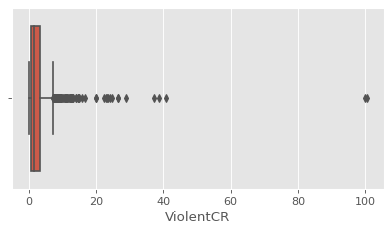

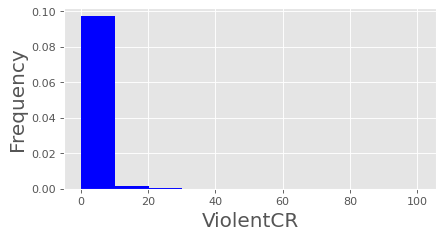

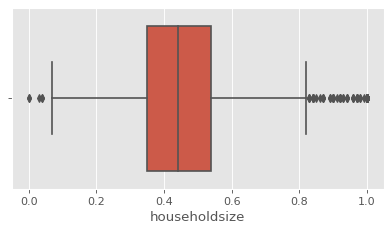

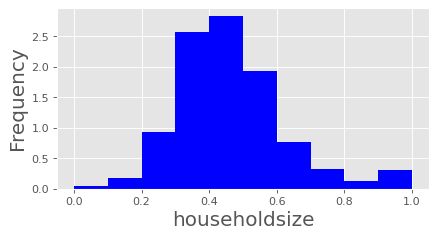

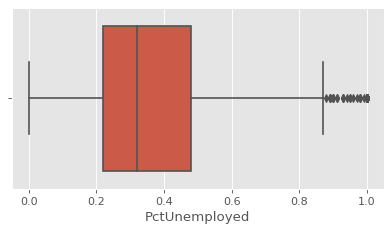

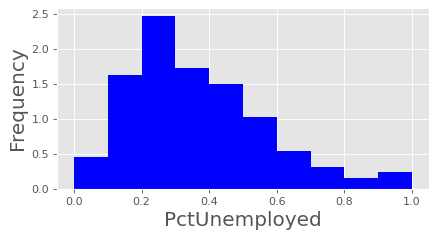

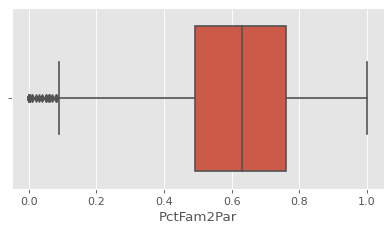

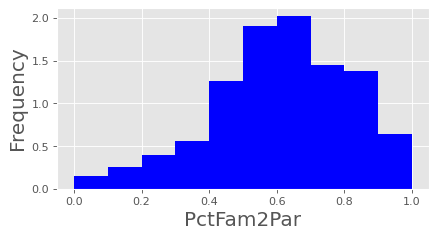

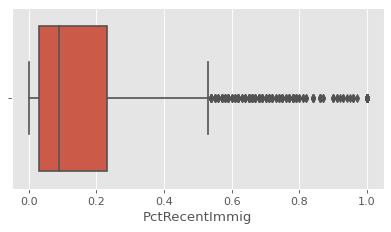

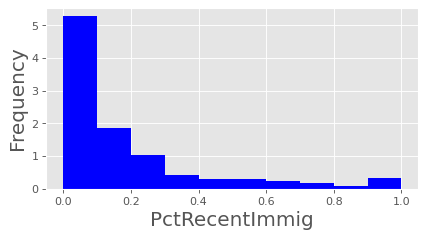

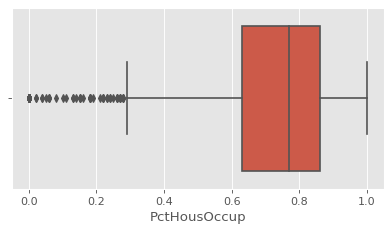

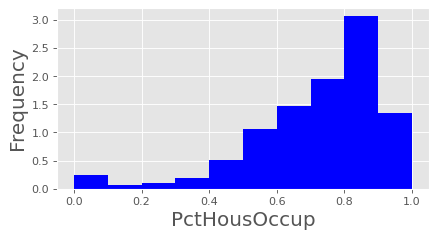

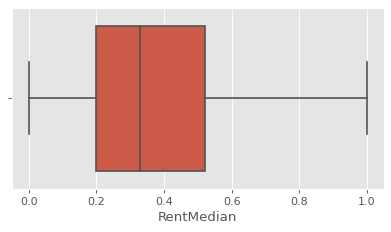

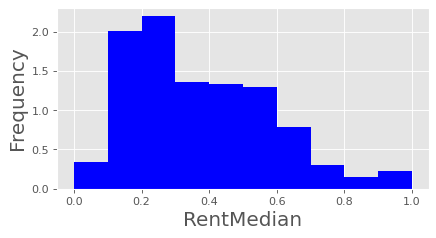

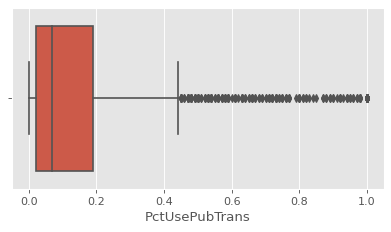

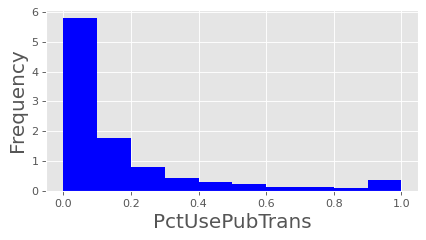

In [10]:
columns = list(df.columns)
for column in columns:
  exploringData(column)

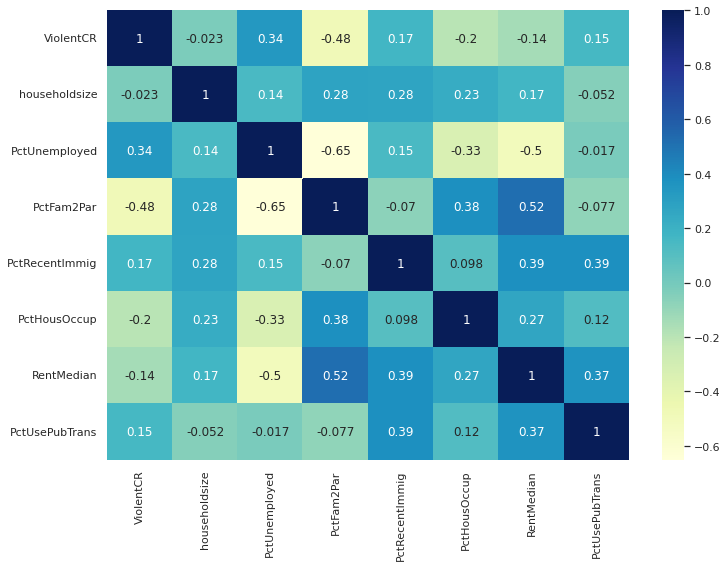

In [11]:
sns.set_theme(color_codes=True)
sns.set(rc={'figure.figsize':(11.7,8.27)})
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
# displaying heatmap
plt.show()

#**Q2**

In [12]:
CrimeRate = df['ViolentCR']

In [13]:
from sklearn.linear_model import LinearRegression
X = df.drop(columns = ['ViolentCR'])
Y = CrimeRate
regression = LinearRegression()
model = regression.fit(X, Y)
print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)

Intercept: 8.31428513123865
Coefficients: [  3.21090514  -0.18345405 -11.56798239   0.92196673  -1.46358042
   1.7361363    1.53050498]


In [14]:
# Evaluate model by using it's R^2 score 
r2 = model.score(X, Y)
print(f"R square of model = {r2}")

R square of model = 0.2674761596073286


In [15]:
import statsmodels.api as sm
X = df.drop(columns = ['ViolentCR'])
X = sm.add_constant(X) # adding a constant
olsmod = sm.OLS(Y, X).fit()
print(olsmod.summary())

                            OLS Regression Results                            
Dep. Variable:              ViolentCR   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.265
Method:                 Least Squares   F-statistic:                     103.6
Date:                Sat, 25 Sep 2021   Prob (F-statistic):          2.05e-129
Time:                        03:29:09   Log-Likelihood:                -5495.3
No. Observations:                1994   AIC:                         1.101e+04
Df Residuals:                    1986   BIC:                         1.105e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              8.3143      0.604     13.

#**Q3**

In [18]:
def sample_stats(size):
  df_sample = df.sample(size, random_state=size)
  X = df_sample.drop(columns = ['ViolentCR'])
  Y = df_sample['ViolentCR']
  regression = LinearRegression()
  model = regression.fit(X, Y)
  r2 = model.score(X, Y)
  intercept = model.intercept_
  coeff = model.coef_
  X = sm.add_constant(X) # adding a constant
  olsmod = sm.OLS(Y, X).fit()
  f_value = olsmod.fvalue
  p_value = olsmod.f_pvalue
  sample_stat = np.insert(coeff, 0, [r2,f_value,p_value,intercept])

  return sample_stat, olsmod

In [19]:
sample_stat, olsmod = sample_stats(50)
print(olsmod.summary())

                            OLS Regression Results                            
Dep. Variable:              ViolentCR   R-squared:                       0.372
Model:                            OLS   Adj. R-squared:                  0.267
Method:                 Least Squares   F-statistic:                     3.548
Date:                Sat, 25 Sep 2021   Prob (F-statistic):            0.00440
Time:                        03:29:10   Log-Likelihood:                -192.65
No. Observations:                  50   AIC:                             401.3
Df Residuals:                      42   BIC:                             416.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              5.8590     11.334      0.

In [20]:
sample_stat, olsmod = sample_stats(100)
print(olsmod.summary())

                            OLS Regression Results                            
Dep. Variable:              ViolentCR   R-squared:                       0.339
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                     6.743
Date:                Sat, 25 Sep 2021   Prob (F-statistic):           1.88e-06
Time:                        03:29:10   Log-Likelihood:                -352.06
No. Observations:                 100   AIC:                             720.1
Df Residuals:                      92   BIC:                             741.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              7.1547      5.864      1.

In [21]:
sample_stat, olsmod = sample_stats(200)
print(olsmod.summary())

                            OLS Regression Results                            
Dep. Variable:              ViolentCR   R-squared:                       0.486
Model:                            OLS   Adj. R-squared:                  0.467
Method:                 Least Squares   F-statistic:                     25.91
Date:                Sat, 25 Sep 2021   Prob (F-statistic):           8.93e-25
Time:                        03:29:10   Log-Likelihood:                -442.60
No. Observations:                 200   AIC:                             901.2
Df Residuals:                     192   BIC:                             927.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              6.4059      1.152      5.

In [22]:
sample_stat, olsmod = sample_stats(500)
print(olsmod.summary())

                            OLS Regression Results                            
Dep. Variable:              ViolentCR   R-squared:                       0.463
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                     60.50
Date:                Sat, 25 Sep 2021   Prob (F-statistic):           1.93e-62
Time:                        03:29:10   Log-Likelihood:                -1158.9
No. Observations:                 500   AIC:                             2334.
Df Residuals:                     492   BIC:                             2368.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              7.8827      0.781     10.

In [23]:
sample_stat, olsmod = sample_stats(1000)
print(olsmod.summary())

                            OLS Regression Results                            
Dep. Variable:              ViolentCR   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.205
Method:                 Least Squares   F-statistic:                     37.81
Date:                Sat, 25 Sep 2021   Prob (F-statistic):           3.93e-47
Time:                        03:29:10   Log-Likelihood:                -2995.2
No. Observations:                1000   AIC:                             6006.
Df Residuals:                     992   BIC:                             6046.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              9.4746      1.074      8.

In [24]:
column_values = ['r2', 'f-stats', 'p-value', 'intercept', 'coeff1', 'coeff2', 'coeff3', 'coeff4', 'coeff5', 'coeff6', 'coeff7']
stats_value = np.empty([0,len(column_values)])
index_value = [50, 100, 200, 300, 400, 500, 1000, 1994]
for x in index_value:
  sample_stat, olsmod = sample_stats(x)
  stats_value = np.append(stats_value, [sample_stat], axis = 0)
df_stats = pd.DataFrame(data = stats_value, index = index_value, columns = column_values)
df_stats

,r2,f-stats,p-value,intercept,coeff1,coeff2,coeff3,coeff4,coeff5,coeff6,coeff7
50,0.371564,3.547518,4.397855e-03,5.858973,20.434032,7.313568,-19.033318,11.559463,-12.278173,5.686776,19.697039
100,0.339098,6.743392,1.875987e-06,7.154654,5.919850,-0.731901,-9.576609,-1.455545,-5.172116,-0.289619,26.370967
200,0.485792,25.912865,8.932823e-25,6.405914,-0.167043,1.790635,-7.882008,3.140596,-1.343723,1.509738,1.237550
300,0.337160,21.218417,4.592177e-23,8.226858,4.256571,-0.214864,-11.716719,-0.745755,-1.040379,1.679424,0.294799
400,0.389827,35.777254,1.423354e-38,8.150661,5.112744,-0.164885,-12.442634,-0.138630,-0.727657,0.646065,1.365837
500,0.462602,60.503145,1.925204e-62,7.882681,4.818221,-0.549962,-11.729764,-0.586893,-1.235502,1.236841,2.282524
1000,0.210609,37.809215,3.934033e-47,9.474630,3.025554,-0.829060,-12.935194,1.371493,-1.681403,1.981094,2.161407
1994,0.267476,103.596366,2.050812e-129,8.314285,3.210905,-0.183454,-11.567982,0.921967,-1.463580,1.736136,1.530505


#**Q4**

In [25]:
def normal_distribution(seed, num, var, var_error):

  sigma = math.sqrt(var)
  sigma_error = math.sqrt(var_error)
  np.random.seed(seed = seed)
  x = np.random.normal(0, sigma, num)
  e = np.random.normal(0, sigma_error, num)
  y = 2.5 - 1.0*x + e
  df = pd.DataFrame({'x_value':x, 'e_value': e, 'y_value': y})
  return df

In [26]:
def scatter_plot(df):
  axl = df.plot(kind='scatter', x='x_value', y='y_value', color='darkblue', alpha=0.5, figsize=(12, 8))
  plt.title('Scatter Plot of Y = 2.50 - 1.0 * X + e', size=20)
  plt.plot(df.x_value, - 1.0 * df.x_value + 2.5, color='darkblue', linewidth=2)
  plt.xlabel('x_value', size=18)
  plt.ylabel('y_value', size=18)

In [27]:
def scatter_samples(df, df_25, df_75):

  axl = df_25.plot(kind='scatter', x='x_value', y='y_value', color='blue', alpha=0.5, figsize=(12, 8))
  df_75.plot(kind='scatter', x='x_value', y='y_value', color='magenta', alpha=0.5, figsize=(12, 8), ax = axl)
  plt.plot(df.x_value, - 1.0 * df.x_value + 2.5, color='darkblue', linewidth=2)
  linear_25 = np.polyfit(df_25.x_value, df_25.y_value, 1)
  plt.plot(df_25.x_value, linear_25[0] * df_25.x_value + linear_25[1], color='green', linewidth=2)
  linear_75 = np.polyfit(df_75.x_value, df_75.y_value, 1)
  plt.plot(df_75.x_value, linear_75[0] * df_75.x_value + linear_75[1], color='orange', linewidth=2)

  # regression equations
  #plt.text(65, 230, 'y={:.2f}+{:.2f}*x'.format(linear_25[1], linear_25[0]), color='green', size=12)
  #plt.text(65, 130, 'y={:.2f}+{:.2f}*x'.format(linear_75[1], linear_75[0]), color='orange', size=12)

  # legend, title and labels.
  plt.legend(labels=['Original Regression Line', 'Regression Line of 25% examples', 'Regression Line of 75% examples', '25% Samples', '75% Samples'])
  plt.title('Scatter Plot', size=20)
  plt.xlabel('x_value', size=18)
  plt.ylabel('y_value', size=18)

In [28]:
df = normal_distribution(0, 100, 2, 3)
df_25 = df.iloc[0:25]
df_75 = df.iloc[25:]
df.head(10)

,x_value,e_value,y_value
0,2.494747,3.261713,3.266966
1,0.565908,-2.334387,-0.400295
2,1.384145,-2.200545,-1.084689
3,3.169102,1.679044,1.009943
4,2.641126,-2.031909,-2.173035
5,-1.382080,3.366451,7.248530
6,1.343628,-0.716409,0.439963
7,-0.214051,-1.294630,1.419422
8,-0.145974,3.330633,5.976607
9,0.580674,2.564327,4.483653


#Q4a

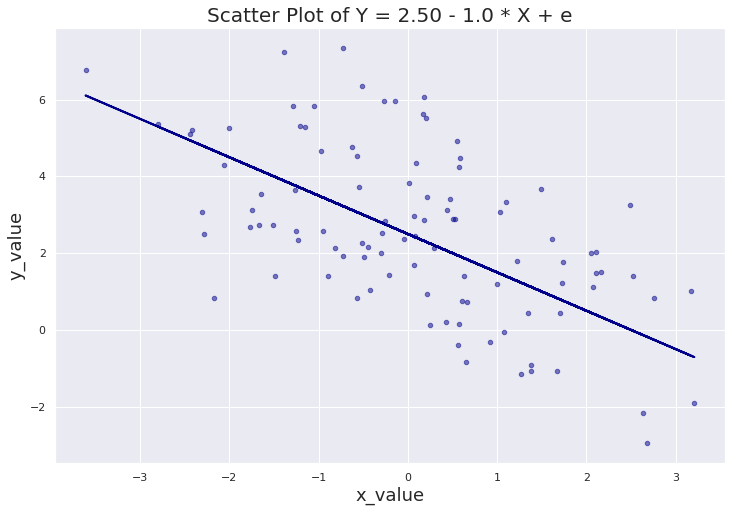

In [29]:
scatter_plot(df)

#Q4b

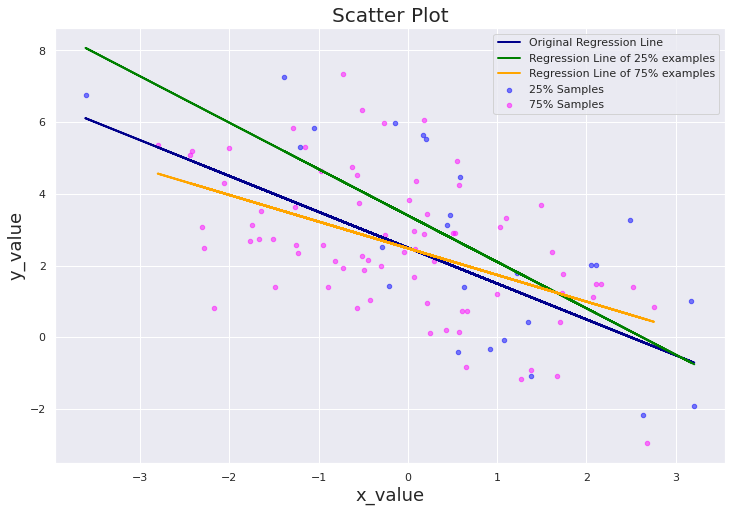

In [30]:
scatter_samples(df, df_25, df_75)

#Q4c

In [31]:
df = normal_distribution(100, 1000, 4, 9)
df_25 = df.iloc[0:250]
df_75 = df.iloc[250:]
df.head(10)

,x_value,e_value,y_value
0,-3.499531,-0.632602,5.366929
1,0.685361,-2.030745,-0.216106
2,2.306072,0.405353,0.599282
3,-0.504872,-0.492759,2.512113
4,1.962642,3.299162,3.836520
5,1.028438,-1.757210,-0.285648
6,0.442359,3.097961,5.155602
7,-2.140087,-2.360474,2.279613
8,-0.378992,4.853226,7.732218
9,0.510003,5.300585,7.290582


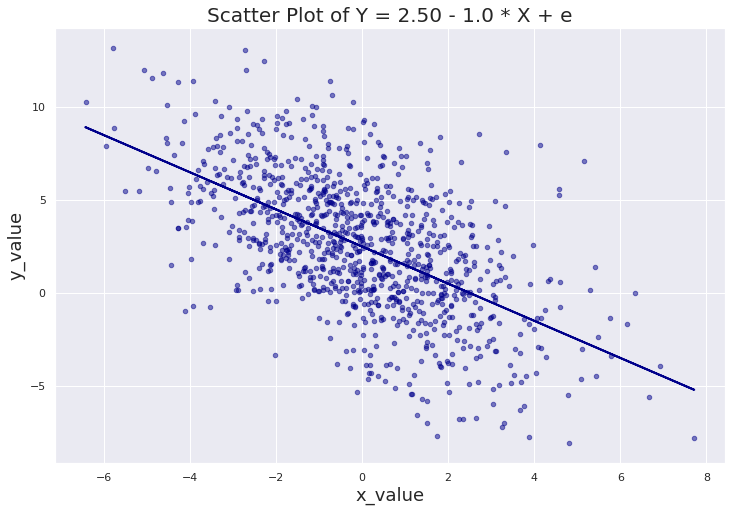

In [32]:
scatter_plot(df)

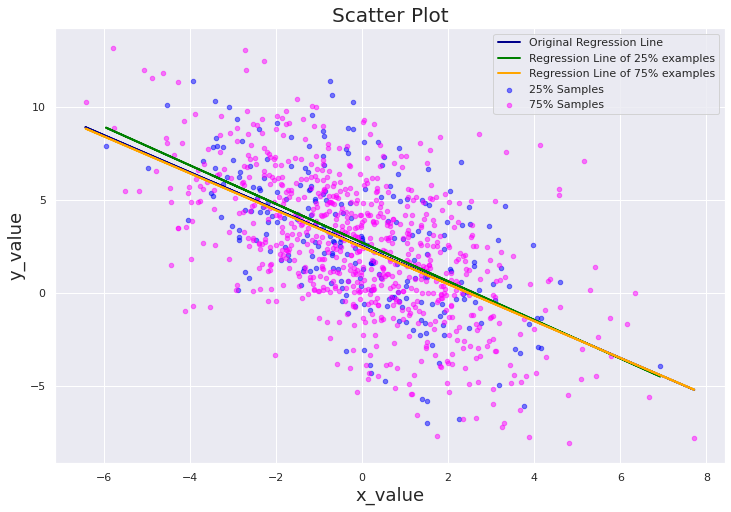

In [33]:
scatter_samples(df, df_25, df_75)

In [34]:
df = normal_distribution(50, 500, 9, 1)
df_25 = df.iloc[0:125]
df_75 = df.iloc[125:]
df.head(10)

,x_value,e_value,y_value
0,-4.681056,-0.001943,7.179113
1,-0.092933,0.388187,2.981120
2,-1.862785,0.054931,4.417716
3,-4.393741,-0.537068,6.356673
4,4.235838,-0.470237,-2.206076
5,-1.430196,0.445400,4.375597
6,-2.341408,1.161671,6.003079
7,3.210803,0.646561,-0.064242
8,-3.846878,-0.694405,5.652473
9,-3.982437,-0.918274,5.564163


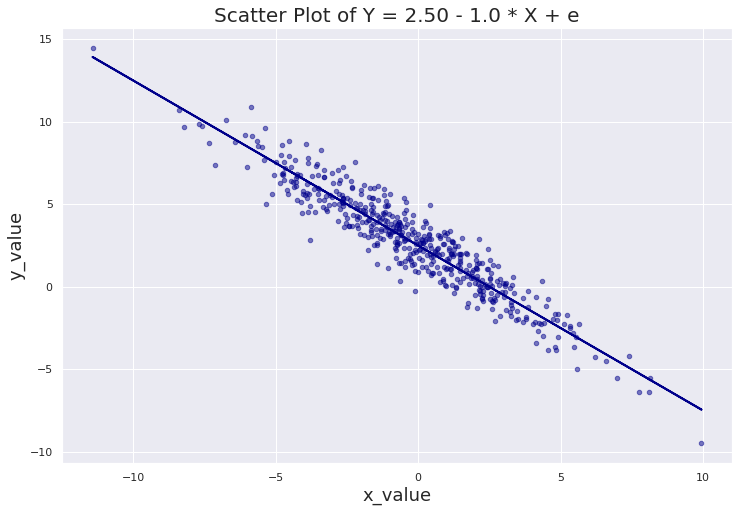

In [35]:
scatter_plot(df)

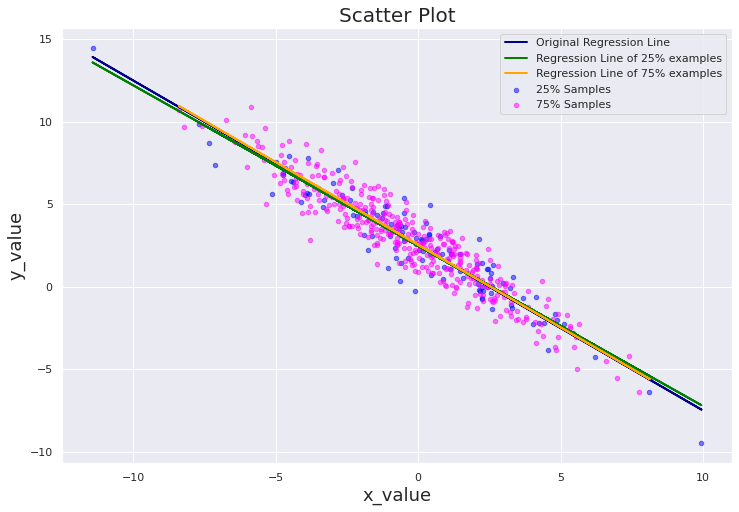

In [36]:
scatter_samples(df, df_25, df_75)

#**Q5**

In [37]:
arr = np.array([1,3,6,7,9,10])
population_mean = np.mean(arr)

#Q5a

In [38]:
sample_means = []
for i, x in enumerate(arr):
  for j in range(i+1, 6):
    temp = (x + arr[j])/2
    sample_means.append(temp)

In [39]:
mn = np.mean(sample_means)
print(f'Population Mean : {population_mean}')
print(f'Mean of Sample Means : {mn}')

Population Mean : 6.0
Mean of Sample Means : 6.0


#Q5c

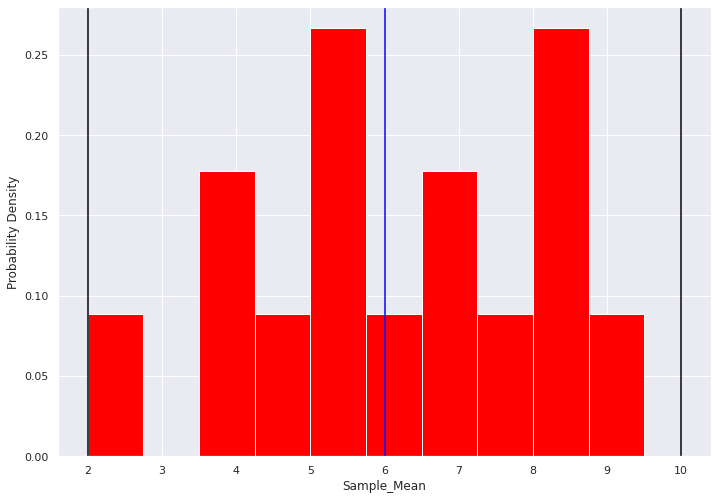

In [40]:
mn = np.mean(sample_means)
std = np.std(sample_means)
plt.hist(sample_means, density = True, color='red')
plt.axvline(mn, color='blue')
plt.axvline(mn-2*std, color = 'black')
plt.axvline(mn+2*std, color = 'black')
plt.xlabel('Sample_Mean')
plt.ylabel('Probability Density')
plt.show()

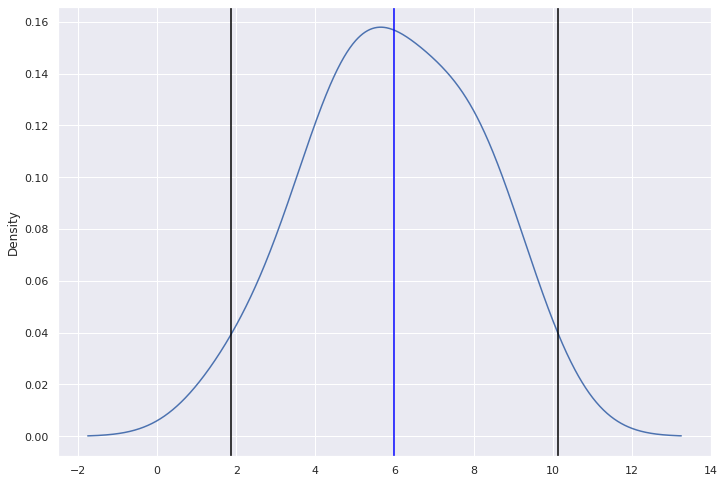

In [41]:
s = pd.Series(sample_means)
mn = s.mean()
std = s.std()
ax = s.plot.kde()
plt.axvline(mn, color='blue')
plt.axvline(mn-2*std, color = 'black')
plt.axvline(mn+2*std, color = 'black')

#Q5b

In [42]:
sample_means = []
for i, x in enumerate(arr):
  for j in range(i+1, 6):
    for k in range(j+1, 6):
      temp = (x + arr[j] + arr[k])/3
      sample_means.append(temp)

In [43]:
mn = np.mean(sample_means)
print(f'Population Mean : {population_mean}')
print(f'Mean of Sample Means : {mn}')

Population Mean : 6.0
Mean of Sample Means : 6.0


#Q5c

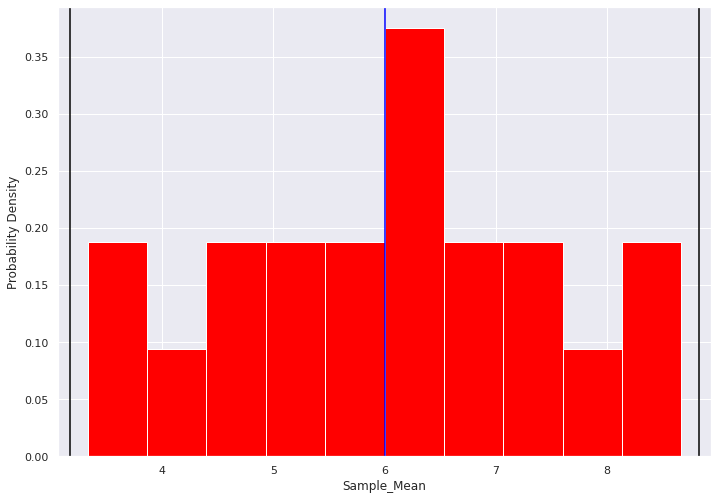

In [44]:
mn = np.mean(sample_means)
std = np.std(sample_means)
plt.hist(sample_means, density = True, color = 'red')
plt.axvline(mn, color='blue')
plt.axvline(mn-2*std, color = 'black')
plt.axvline(mn+2*std, color = 'black')
plt.xlabel('Sample_Mean')
plt.ylabel('Probability Density')
plt.show()

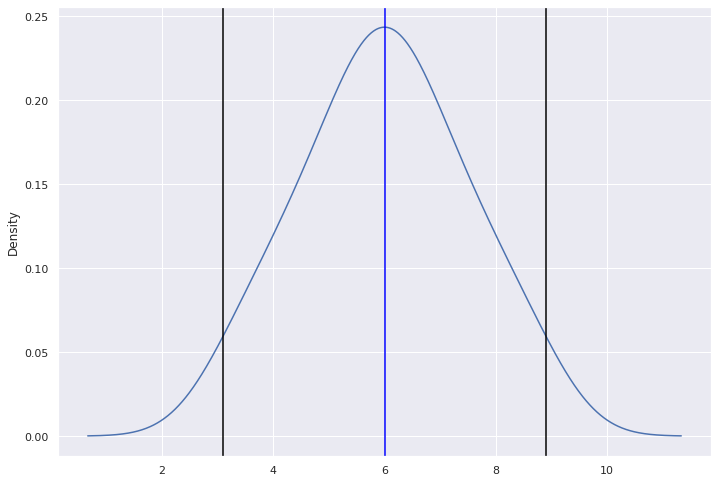

In [45]:
s = pd.Series(sample_means)
mn = s.mean()
std = s.std()
ax = s.plot.kde()
plt.axvline(mn, color='blue')
plt.axvline(mn-2*std, color = 'black')
plt.axvline(mn+2*std, color = 'black')